In [41]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [42]:
virus_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                            'Age', 
                                                                                            'Health_Status', 
                                                                                            'Archaeal', 
                                                                                            'Bacteriophage', 
                                                                                            'Eukaryotic', 
                                                                                            'crassphage'], axis=1)

In [43]:
virus_df.head()

,Healthy,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,...,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae,Age_Child,Age_Adult,Age_Infant,Age_Elderly,Age_Mix
0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
1,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,3.84,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.84,0.0,0.0,1,0,0,0,0
4,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0


In [44]:
virus_df.head()

,Healthy,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,...,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae,Age_Child,Age_Adult,Age_Infant,Age_Elderly,Age_Mix
0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
1,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,3.84,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.84,0.0,0.0,1,0,0,0,0
4,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0


<AxesSubplot:xlabel='Healthy'>

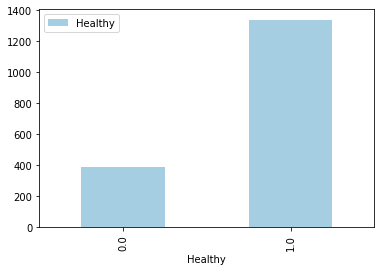

In [45]:
virus_df.groupby(['Healthy'])[['Healthy']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(virus_df))))

In [46]:
target = 'Healthy'

X = virus_df.loc[:,virus_df.columns!=target]
y = virus_df.loc[:,virus_df.columns==target]

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

virus_df = pd.concat([X, y], axis=1)

<AxesSubplot:xlabel='Healthy'>

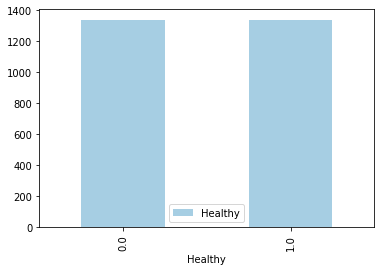

In [47]:
virus_df.groupby(['Healthy'])[['Healthy']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(virus_df))))

In [48]:
virus_df[virus_df != 0.0] = 1.0

In [49]:
apriori_df = apriori(virus_df, min_support = 0.05, use_colnames = True)

In [50]:
apriori_df

,support,itemsets
0,0.071001,(Anelloviridae)
1,0.080344,(Circoviridae)
2,0.103513,(Genomoviridae)
3,0.057175,(Herpesviridae)
4,0.145366,(Inoviridae)
...,...,...
169,0.174514,"(Siphoviridae, Podoviridae, Microviridae, Heal..."
170,0.282138,"(Siphoviridae, Myoviridae, Podoviridae, Health..."
171,0.092676,"(Siphoviridae, Myoviridae, Podoviridae, Microv..."
172,0.050448,"(Siphoviridae, Myoviridae, Podoviridae, Health..."


In [51]:
df_ar = association_rules(apriori_df, metric = "confidence", min_threshold = 0.05)

In [52]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Anelloviridae),(Microviridae),0.071001,0.575859,0.051943,0.731579,1.270412,0.011056,1.580131
1,(Microviridae),(Anelloviridae),0.575859,0.071001,0.051943,0.090201,1.270412,0.011056,1.021103
2,(Anelloviridae),(Myoviridae),0.071001,0.699178,0.051570,0.726316,1.038814,0.001927,1.099158
3,(Myoviridae),(Anelloviridae),0.699178,0.071001,0.051570,0.073757,1.038814,0.001927,1.002975
4,(Anelloviridae),(Podoviridae),0.071001,0.827728,0.054933,0.773684,0.934708,-0.003837,0.761202
...,...,...,...,...,...,...,...,...,...
1775,(Myoviridae),"(Siphoviridae, Podoviridae, Microviridae, Heal...",0.699178,0.174514,0.142377,0.203634,1.166864,0.020360,1.036566
1776,(Podoviridae),"(Siphoviridae, Myoviridae, Microviridae, Healt...",0.827728,0.155830,0.142377,0.172009,1.103828,0.013392,1.019541
1777,(Microviridae),"(Siphoviridae, Myoviridae, Podoviridae, Health...",0.575859,0.282138,0.142377,0.247242,0.876318,-0.020095,0.953643
1778,(Healthy),"(Siphoviridae, Myoviridae, Podoviridae, Microv...",0.500000,0.312780,0.142377,0.284753,0.910394,-0.014013,0.960815


In [53]:
df_ar_healthy = df_ar[df_ar['antecedents']==frozenset({'Healthy'})]

In [54]:
df_ar_healthy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(Healthy),(Inoviridae),0.5,0.145366,0.059791,0.119581,0.822622,-0.012892,0.970713
54,(Healthy),(Microviridae),0.5,0.575859,0.257848,0.515695,0.895522,-0.030082,0.875772
62,(Healthy),(Myoviridae),0.5,0.699178,0.379671,0.759342,1.086050,0.030082,1.250000
68,(Healthy),(Podoviridae),0.5,0.827728,0.411435,0.822870,0.994131,-0.002429,0.972574
72,(Healthy),(Siphoviridae),0.5,0.872571,0.451046,0.902093,1.033833,0.014761,1.301527
74,(Healthy),(Age_Adult),0.5,0.800448,0.393498,0.786996,0.983193,-0.006726,0.936842
265,(Healthy),"(Inoviridae, Myoviridae)",0.5,0.137145,0.055680,0.111360,0.811989,-0.012892,0.970984
283,(Healthy),"(Inoviridae, Podoviridae)",0.5,0.140882,0.055680,0.111360,0.790451,-0.014761,0.966779
295,(Healthy),"(Inoviridae, Siphoviridae)",0.5,0.140508,0.058670,0.117339,0.835106,-0.011584,0.973751
301,(Healthy),"(Inoviridae, Age_Adult)",0.5,0.133782,0.056801,0.113602,0.849162,-0.010090,0.977234


In [55]:
df_ar_healthy[df_ar_healthy['lift']>1.05]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(Healthy),(Myoviridae),0.5,0.699178,0.379671,0.759342,1.086050,0.030082,1.250000
379,(Healthy),"(Podoviridae, Myoviridae)",0.5,0.639013,0.340433,0.680867,1.065497,0.020927,1.131148
391,(Healthy),"(Siphoviridae, Myoviridae)",0.5,0.680867,0.371824,0.743647,1.092206,0.031390,1.244898
397,(Healthy),"(Age_Adult, Myoviridae)",0.5,0.601644,0.320254,0.640508,1.064596,0.019432,1.108108
1008,(Healthy),"(Podoviridae, Siphoviridae, Myoviridae)",0.5,0.624439,0.335949,0.671898,1.076002,0.023729,1.144647
1036,(Healthy),"(Age_Adult, Siphoviridae, Myoviridae)",0.5,0.587818,0.315022,0.630045,1.071837,0.021114,1.114141
